In [ ]:
!wget -O TestSampleImage.jpg https://raw.githubusercontent.com/BharathChalla/ArtificialIntelligence/main/NeuralNetworks/TestSampleImage.jpg

(300, 276, 3)
(300, 276)


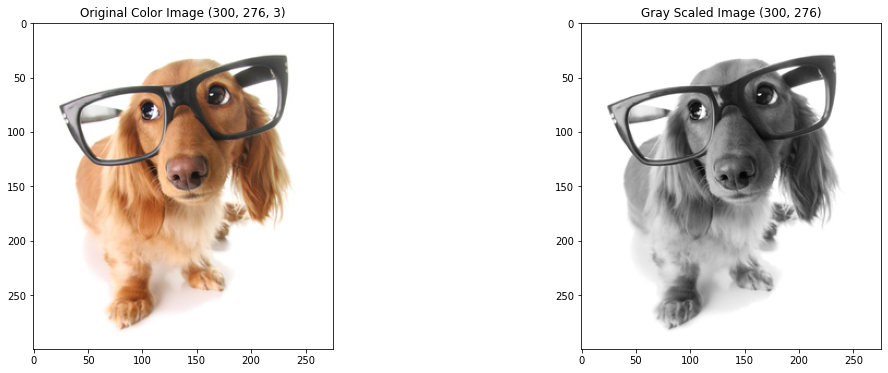

In [2]:
import cv2
from matplotlib import pyplot as plt

original_image = cv2.imread('./TestSampleImage.jpg') # cv.im*() works in BGR format
# plt.show(image) - shows in BGR
print(original_image.shape)
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

gray_scaled_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_scaled_image.shape)

# Gray = cv2.split(gray_scaled_image)
# cv2.imshow("Gray", Gray)

# from google.colab.patches import cv2_imshow
# cv2_imshow(gray_scaled_image)

f, ax_arr = plt.subplots(1, 2, figsize=(18,6))
ax_arr[0].imshow(image)
ax_arr[0].set_title(f'Original Color Image {image.shape}')

ax_arr[1].imshow(gray_scaled_image, cmap="gray")
ax_arr[1].set_title(f'Gray Scaled Image {gray_scaled_image.shape}')

plt.show()

In [3]:
from torchvision import transforms
convert_tensor = transforms.ToTensor()

gray_scaled_image_tensor = convert_tensor(gray_scaled_image)
print(gray_scaled_image_tensor.shape)

torch.Size([1, 300, 276])


In [4]:
import torch
from torch import nn

class EdgeDetectorCNN(nn.Module):

    def __init__(self, custom_kernel):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1,
                               kernel_size=3, bias=False)
        self.conv1.weight = torch.nn.Parameter(custom_kernel)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.AvgPool2d(kernel_size=3, stride=None, padding=0)
        self.fc1 = nn.Softmax(2)

    @staticmethod
    def plot_channels(img_tensor, axis, title):
        axis.imshow(img_tensor[0, 0].data.numpy(), cmap='gray')
        axis.set_title(title)
        
    def forward(self, input_image):
        conv_image = self.conv1(input_image)
        relu_image = self.relu1(conv_image)
        pooled_image = self.pool1(relu_image)

        # Plot Image Channels
        f, ax_arr = plt.subplots(1, 4, figsize=(18,6))
        # print(input_image.shape)
        self.plot_channels(input_image, ax_arr[0], 'Input to Convolution Layer')
        self.plot_channels(conv_image, ax_arr[1], 'Output of Convolution Layer')
        self.plot_channels(relu_image, ax_arr[2], 'Output of Relu layer')
        self.plot_channels(pooled_image, ax_arr[3], 'Output of Pooling layer')
        # print(pooled_image.shape)
        plt.show() 

Vertical Filter:
tensor([[[[-10.,   0.,  10.],
          [-10.,   0.,  10.],
          [-10.,   0.,  10.]]]])

Applying Vertical Filter:



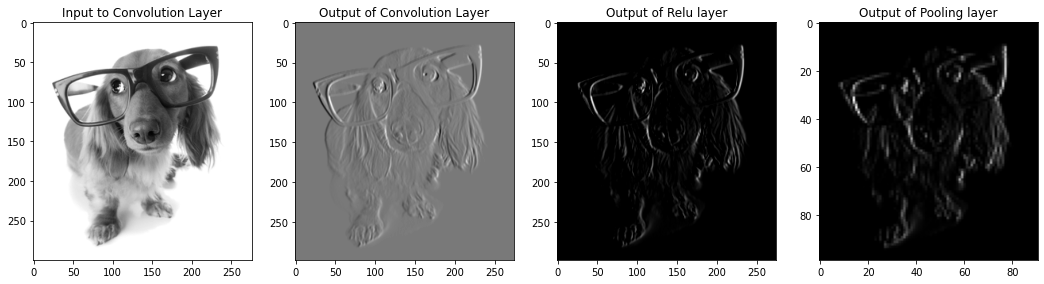

In [5]:
# Define Vertical Filter
vertical_edge_detection_filter = torch.Tensor([[[
    [-10, 0, 10], 
    [-10, 0, 10], 
    [-10, 0, 10]
    ]]])
print("Vertical Filter:")
print(vertical_edge_detection_filter)
print()

# Applying the Vertical Filter
print("Applying Vertical Filter:\n")
edge_detector_model = EdgeDetectorCNN(vertical_edge_detection_filter)
edge_detector_model(gray_scaled_image_tensor.unsqueeze(0))

Horizontal Filter:
tensor([[[[-10., -10., -10.],
          [  0.,   0.,   0.],
          [ 10.,  10.,  10.]]]])

Applying Horizontal Filter:



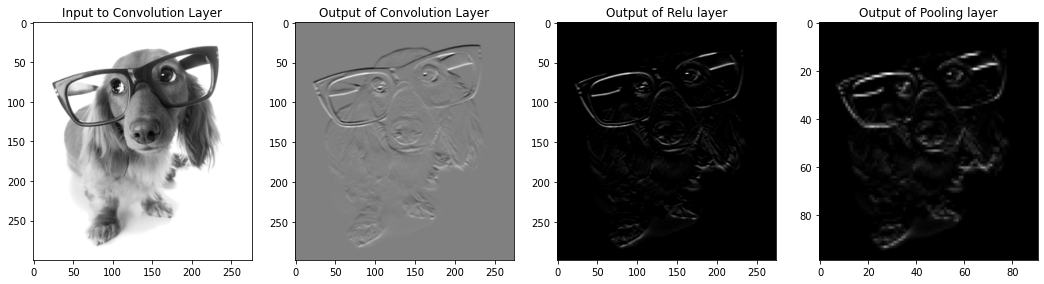

In [6]:
# Define Horizontal Filter
print("Horizontal Filter:")
horizontal_edge_detection_filter = torch.Tensor([[[
    [-10, -10, -10], 
    [ +0,  +0,  +0], 
    [+10, +10, +10]]]])
print(horizontal_edge_detection_filter)
print()

# Applying the Horizontal Filter
print("Applying Horizontal Filter:\n")
edge_detector_model = EdgeDetectorCNN(horizontal_edge_detection_filter)
edge_detector_model(gray_scaled_image_tensor.unsqueeze(0))